# Análise de Venda de Imóveis nos Estados Unidos
   Este projeto tem como objetivo realizar uma Análise Exploratória de Dados (EDA) para obter insights sobre as vendas de imóveis em 15 estados dos Estados Unidos. O foco é examinar um conjunto abrangente de dados de vendas de imóveis e fornecer insights valiosos para entender o mercado imobiliário no país. Por meio da exploração e visualização dos dados, pretendemos identificar padrões, tendências e relacionamentos dentro do mercado imobiliário, o que nos permitirá tomar decisões e observações embasadas.
   - A base de dados foi disponibilizada na plataforma Kaggle
   - Contém informações sobre venda de imóveis nos EUA
   - Pode ser utilizada para ajudar na hora de estimar valores de vendas de imóveis

   É importante ressaltar que este projeto é baseado no modelo descrito no livro "Think Stats Exploratory Data Analysis", escrito por Allen B. Downey. Estou utilizando esse livro com o objetivo de aprimorar meus conhecimentos estatísticos e de análise de dados, buscando aprender e complementar minhas habilidades nessa área. <br>
   *A base de dados utilizada no livro é diferente da qual utilizarei para a realização do projeto.

In [399]:
import pandas as pd
import numpy as np

In [400]:
df = pd.read_csv('data/realtor-data.csv')
df.head()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0


De acordo com as informações disponibilizadas no Kaggle, o tamanho do lote está em acres e o tamanho da casa está em pés². Irei converte-los para metros quadrados para facilitar a interpretação

In [401]:
df.shape

(407890, 10)

In [402]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407890 entries, 0 to 407889
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   status          407890 non-null  object 
 1   bed             320108 non-null  float64
 2   bath            321618 non-null  float64
 3   acre_lot        331873 non-null  float64
 4   city            407838 non-null  object 
 5   state           407890 non-null  object 
 6   zip_code        407693 non-null  float64
 7   house_size      324365 non-null  float64
 8   prev_sold_date  140950 non-null  object 
 9   price           407890 non-null  float64
dtypes: float64(6), object(4)
memory usage: 31.1+ MB


In [403]:
df['state'].value_counts()

Massachusetts     173479
New Hampshire      51394
Vermont            46460
Connecticut        38180
Maine              36650
Rhode Island       28518
Puerto Rico        24679
New York            5829
Virgin Islands      2573
Georgia               48
South Carolina        24
Tennessee             20
Virginia              20
New Jersey            13
Wyoming                3
Name: state, dtype: int64

A maioria dos estados com dados neste dataset pertence a subregião dos EUA chamada de Nova Inglaterra, à exeção de Puerto Rico e Virgin Islands todos os estados com mais de 2 mil registros estão localizados nesta região.

In [404]:
cid = df['city'].value_counts()
cid.head(15)

Boston         31502
San Juan        4788
Providence      4222
Springfield     3987
Worcester       3697
Ludlow          3467
Hartford        3463
Cambridge       3341
Manchester      3112
Somerville      2717
Brookline       2685
Pittsfield      2595
Newton          2578
Bristol         2452
Killington      2264
Name: city, dtype: int64

In [405]:
df.describe()

,bed,bath,acre_lot,zip_code,house_size,price
count,320108.000000,321618.000000,331873.000000,407693.000000,3.243650e+05,4.078900e+05
mean,3.500200,2.566545,17.418487,3299.396838,2.222783e+03,6.758307e+05
std,2.320135,2.391618,931.723094,2222.641467,3.333098e+03,1.178266e+06
min,1.000000,1.000000,0.000000,601.000000,1.000000e+02,1.000000e+00
25%,2.000000,2.000000,0.200000,1890.000000,1.206000e+03,1.999000e+05
50%,3.000000,2.000000,0.560000,2822.000000,1.767000e+03,3.979000e+05
75%,4.000000,3.000000,2.200000,4630.000000,2.640000e+03,7.090000e+05
max,99.000000,198.000000,100000.000000,99999.000000,1.450112e+06,6.000000e+07


## Transformação de Dados

In [406]:
df.isna().sum() / len(df) * 100

status             0.000000
bed               21.520998
bath              21.150800
acre_lot          18.636642
city               0.012749
state              0.000000
zip_code           0.048297
house_size        20.477335
prev_sold_date    65.444115
price              0.000000
dtype: float64

Analisando os dados faltantes é possível fazer algumas presunções:
- O número de quartos, banheiros e tamanho de casa nulos é bem próximo o que pode indicar a venda de lotes ao invés de construções.
- As labels com tamanho do terreno nulo podem indicar um apartamento, casa geminada ou simplesmente uma casa com porta para a rua.
- A variável 'prev_sold_date' indica a data em que o imóvel foi vendido anteriormente, vou presumir que se o valor é nulo significa que a casa nunca foi vendida anteriormente.

In [407]:
#possíveis apartamentos
df.loc[(df['house_size'] > 0) & (df['bed'] > 0) & (df['bath'] > 0) & (df['acre_lot'].isna())].sample(25)

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
403970,for_sale,2.0,2.0,NaN,Waterbury,Connecticut,6708.0,960.0,NaN,115000.0
305782,for_sale,3.0,2.0,NaN,Lewiston,Maine,4240.0,1188.0,NaN,72000.0
105453,for_sale,2.0,1.0,NaN,Boston,Massachusetts,2130.0,930.0,NaN,609000.0
335860,for_sale,4.0,4.0,NaN,Hartford,Vermont,5059.0,2262.0,NaN,510000.0
145906,for_sale,1.0,1.0,NaN,Boston,Massachusetts,2127.0,700.0,NaN,779000.0
51825,for_sale,3.0,3.0,NaN,Vernon,Connecticut,6066.0,1303.0,2016-01-19,264900.0
163853,for_sale,3.0,2.0,NaN,Boston,Massachusetts,2135.0,1370.0,NaN,799000.0
21298,for_sale,3.0,2.0,NaN,San Juan,Puerto Rico,926.0,1250.0,NaN,245000.0
169685,for_sale,5.0,3.0,NaN,Cambridge,Massachusetts,2141.0,2342.0,NaN,2249000.0
66204,for_sale,4.0,3.0,NaN,Lenox,Massachusetts,1240.0,2392.0,2003-06-06,1250000.0


Há um bom número de labels que se encaixam nesse filtro e aparentam ter dados válidos contendo informações sobre o endereço e o preço de venda do imóvel. Irei dar um flag neles como possívelmente apartamentos.

In [408]:
df['apto'] = False
df.loc[(df['house_size'] > 0) & (df['bed'] > 0) & (df['bath'] > 0) & (df['acre_lot'].isna()), 'apto'] = True

df.loc[df['apto'] == True, 'acre_lot'] = 0.0

In [409]:
df.isna().sum()

status                 0
bed                87782
bath               86272
acre_lot            2917
city                  52
state                  0
zip_code             197
house_size         83525
prev_sold_date    266940
price                  0
apto                   0
dtype: int64

Ok, consegui lidar com a maioria dos nulos referentes a 'acre_lot', agora é só fazer o mesmo com os possíveis lotes.

In [410]:
df.loc[df['bed'].isna()  & df['bath'].isna() & df['house_size'].isna()].sample(20)

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price,apto
376841,for_sale,NaN,NaN,10.15,Greenwich,New York,12834.0,NaN,NaN,69950.0,False
329442,for_sale,NaN,NaN,10.00,Morrill,Maine,4952.0,NaN,NaN,59000.0,False
255709,for_sale,NaN,NaN,184.00,New Hampton,New Hampshire,3256.0,NaN,NaN,1899000.0,False
361614,for_sale,NaN,NaN,1.42,Barre,Vermont,5641.0,NaN,NaN,285000.0,False
17931,for_sale,NaN,NaN,0.64,Christiansted,Virgin Islands,820.0,NaN,NaN,64000.0,False
55020,for_sale,NaN,NaN,6.80,New Lebanon,New York,12212.0,NaN,NaN,89000.0,False
201206,for_sale,NaN,NaN,6.00,East Sandwich,Massachusetts,2537.0,NaN,NaN,750000.0,False
34129,for_sale,NaN,NaN,3.99,Hatfield,Massachusetts,1038.0,NaN,NaN,65000.0,False
260581,for_sale,NaN,NaN,2.11,Thornton,New Hampshire,3285.0,NaN,NaN,150000.0,False
269298,for_sale,NaN,NaN,1.94,New London,New Hampshire,3257.0,NaN,NaN,100000.0,False


Aparentemente, as labels em que não há tamanho da casa, nº de quartos ou banheiros aparentam ter dados referentes ao tamanho do terreno e preço de venda o que embasa melhor a ideia de serem possíveis lotes.

In [411]:
df['lote'] = False
df.loc[(df['acre_lot'] > 0) & (df['bed'].isna()) & (df['bath'].isna()) & (df['house_size'].isna()), 'lote'] = True

df.loc[df['lote'] == True, ['bed', 'bath', 'house_size']] = 0.0

In [412]:
df.isna().sum()

status                 0
bed                 6273
bath                4763
acre_lot            2917
city                  52
state                  0
zip_code             197
house_size          2016
prev_sold_date    266940
price                  0
apto                   0
lote                   0
dtype: int64

In [413]:
hist_vendas = {'prev_sold_date': 0}
df.fillna(value=hist_vendas, inplace=True)

In [414]:
df.isna().sum()

status               0
bed               6273
bath              4763
acre_lot          2917
city                52
state                0
zip_code           197
house_size        2016
prev_sold_date       0
price                0
apto                 0
lote                 0
dtype: int64

In [415]:
df['lote_size_m'] = round(df['acre_lot'] * 4047, 1)
df['house_size_m'] = round(df['house_size'] / 10.764, 1)

df.drop(columns=['acre_lot', 'house_size'], inplace=True)

df.head()

,status,bed,bath,city,state,zip_code,prev_sold_date,price,apto,lote,lote_size_m,house_size_m
0,for_sale,3.0,2.0,Adjuntas,Puerto Rico,601.0,0,105000.0,False,False,485.6,85.5
1,for_sale,4.0,2.0,Adjuntas,Puerto Rico,601.0,0,80000.0,False,False,323.8,141.9
2,for_sale,2.0,1.0,Juana Diaz,Puerto Rico,795.0,0,67000.0,False,False,607.0,69.5
3,for_sale,4.0,2.0,Ponce,Puerto Rico,731.0,0,145000.0,False,False,404.7,167.2
4,for_sale,6.0,2.0,Mayaguez,Puerto Rico,680.0,0,65000.0,False,False,202.4,NaN


In [416]:
df = df.dropna()
df.isna().sum()

status            0
bed               0
bath              0
city              0
state             0
zip_code          0
prev_sold_date    0
price             0
apto              0
lote              0
lote_size_m       0
house_size_m      0
dtype: int64

In [417]:
df['state'].value_counts()

Massachusetts     170640
New Hampshire      49832
Vermont            44846
Connecticut        37253
Maine              35851
Rhode Island       28375
Puerto Rico        23918
New York            5640
Virgin Islands      2272
Georgia               48
Tennessee             20
New Jersey            13
Virginia              11
Wyoming                3
Name: state, dtype: int64

In [418]:
remove_states_list = []

for state in df['state'].unique():
    if df['state'].value_counts()[state] < 1000:
        remove_states_list.append(state)
        
#removendo
df = df.loc[~df['state'].isin(remove_states_list)]

In [419]:
df['state'].value_counts()

Massachusetts     170640
New Hampshire      49832
Vermont            44846
Connecticut        37253
Maine              35851
Rhode Island       28375
Puerto Rico        23918
New York            5640
Virgin Islands      2272
Name: state, dtype: int64

# Análise Exploratória

In [420]:
import matplotlib.pyplot as plt
import seaborn as sns

#sns.color_palette("rocket", as_cmap=True) #rocket, #crest

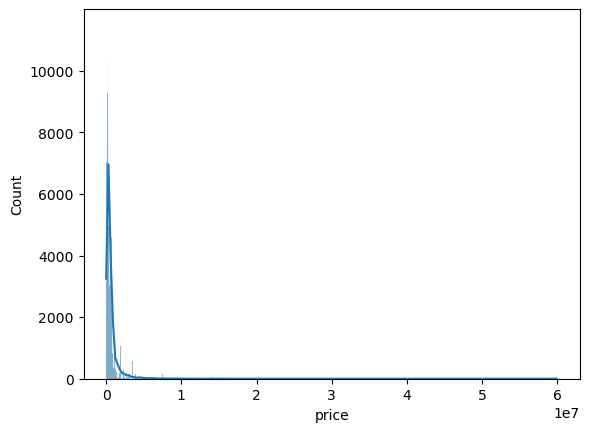

In [421]:
sns.histplot(data=df, x='price', kde=True);

<Axes: xlabel='price'>

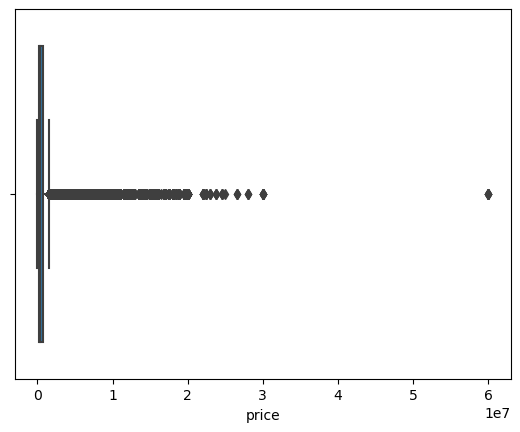

In [422]:
sns.boxplot(data=df, x='price')

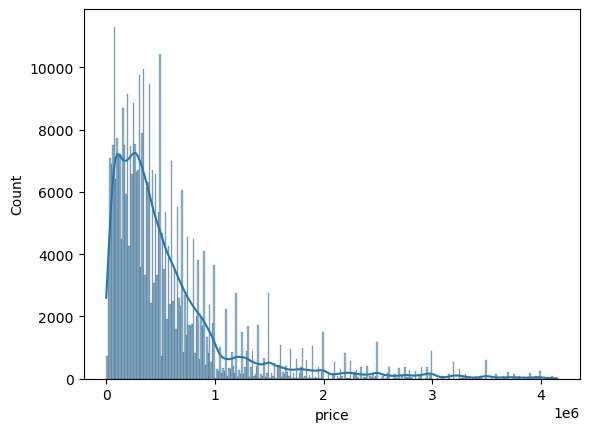

In [423]:
df = df[df['price'] < (df['price'].mean() + 3 * df['price'].std())]
sns.histplot(data=df, x='price', kde=True);

##### Qual o preço médio de um imóvel?

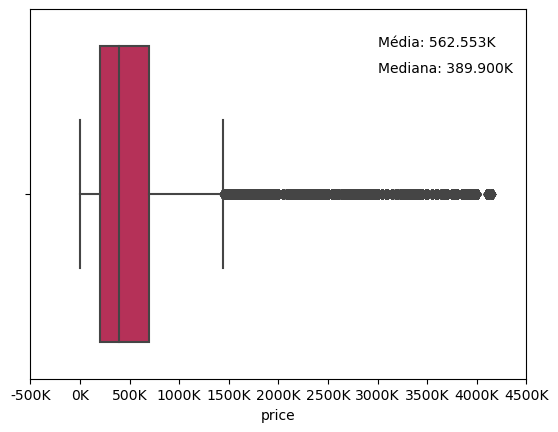

In [424]:
media = 'Média: ' + str('{:,.0f}K'.format(df['price'].mean()).replace(',', '.'))
mediana = 'Mediana: ' + str('{:,.0f}K'.format(df['price'].median()).replace(',', '.'))

g = sns.boxplot(data=df, x='price', palette='rocket')

plt.text(x=3000000, y=-0.4, s=media)
plt.text(x=3000000, y=-0.33, s=mediana)

g.set(xlim = (-100000, 4300000))
xticks = g.get_xticks()
xlabels = ['{:.0f}K'.format(x/1000) for x in xticks]

g.set_xticks(xticks)
g.set_xticklabels(xlabels);

##### Qual o preço médio do metro quadrado?

In [425]:
df['preco_m2'] = df['price'] / df['house_size_m']

#lidando com valores "inf"
df.loc[df['house_size_m'] == 0, 'preco_m2'] = 0.0

In [426]:
nolote_df = df.loc[df['preco_m2'] > 0]

media_nolote = 'Média: ' + str('{:,.0f}K'.format(nolote_df['preco_m2'].mean()).replace(',', '.'))
mediana_nolote = 'Mediana: ' + str('{:,.0f}K'.format(nolote_df['preco_m2'].median()).replace(',', '.'))

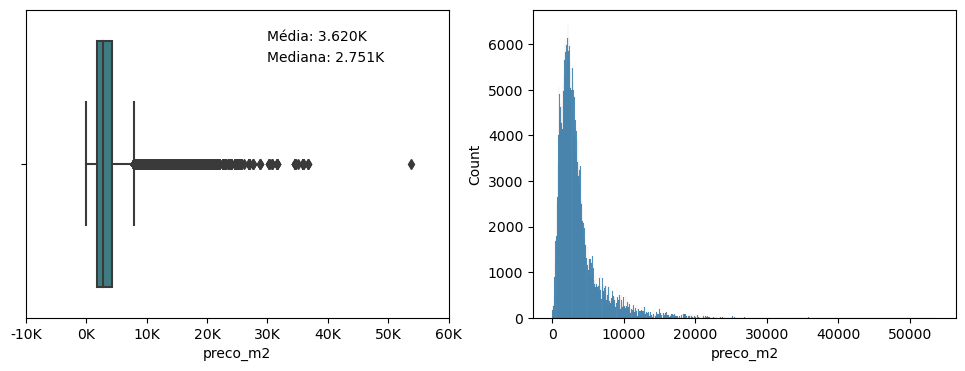

In [427]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)

g = sns.boxplot(data=nolote_df, x='preco_m2', palette='crest')

plt.text(x=30000, y=-0.4, s=media_nolote)
plt.text(x=30000, y=-0.33, s=mediana_nolote)

xticks = g.get_xticks()
xlabels = ['{:.0f}K'.format(x/1000) for x in xticks]

g.set_xticks(xticks)
g.set_xticklabels(xlabels);

plt.subplot(1,2,2)
sns.histplot(data=nolote_df, x='preco_m2');

##### Quais os estados com maior número de registro de venda de imóveis? E qual o tamanho médio dela?

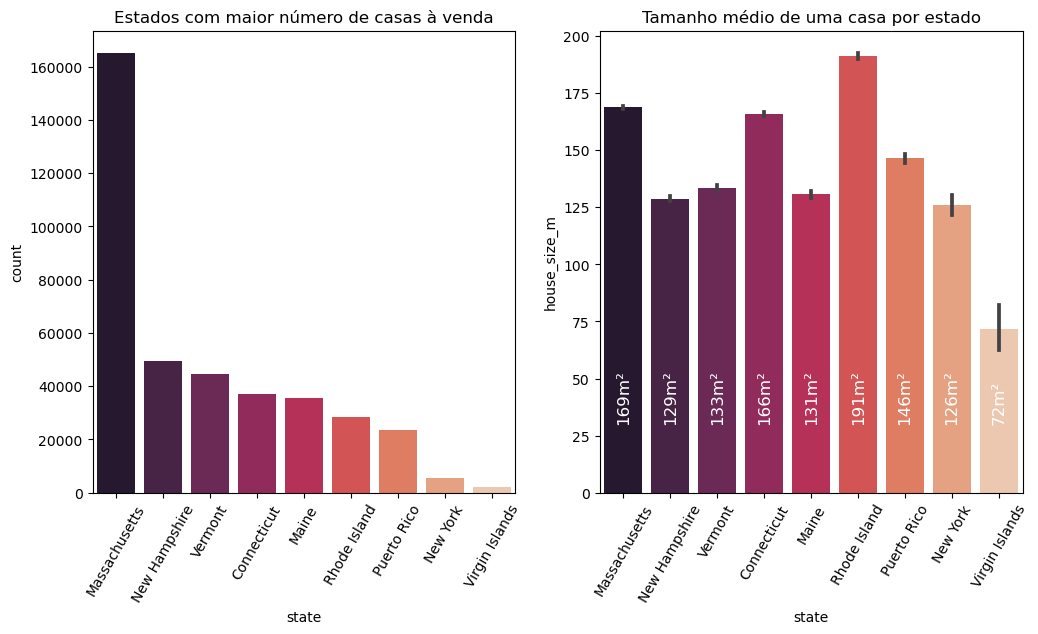

In [428]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.countplot(x=df['state'], order=df['state'].value_counts(ascending=False).index, palette='rocket')
plt.title('Estados com maior número de casas à venda')
plt.xticks(rotation=60);

plt.subplot(1,2,2)
sns.barplot(data=df, x='state', y='house_size_m', estimator='mean', 
            order=df['state'].value_counts(ascending=False).index, palette='rocket')
plt.title('Tamanho médio de uma casa por estado')
plt.xticks(rotation=60);

mean_house_size = df.groupby('state')['house_size_m'].mean()
mean_house_size_ordered = mean_house_size[df['state'].value_counts(ascending=False).index]

for i, mean_value in enumerate(mean_house_size_ordered):
    plt.text(i, 30, f'{mean_value:.0f}m²', ha='center', va='bottom', rotation=90, fontsize=12, color='white')

##### Qual o preço médio de uma casa por estado? E o preço por metro quadrado?

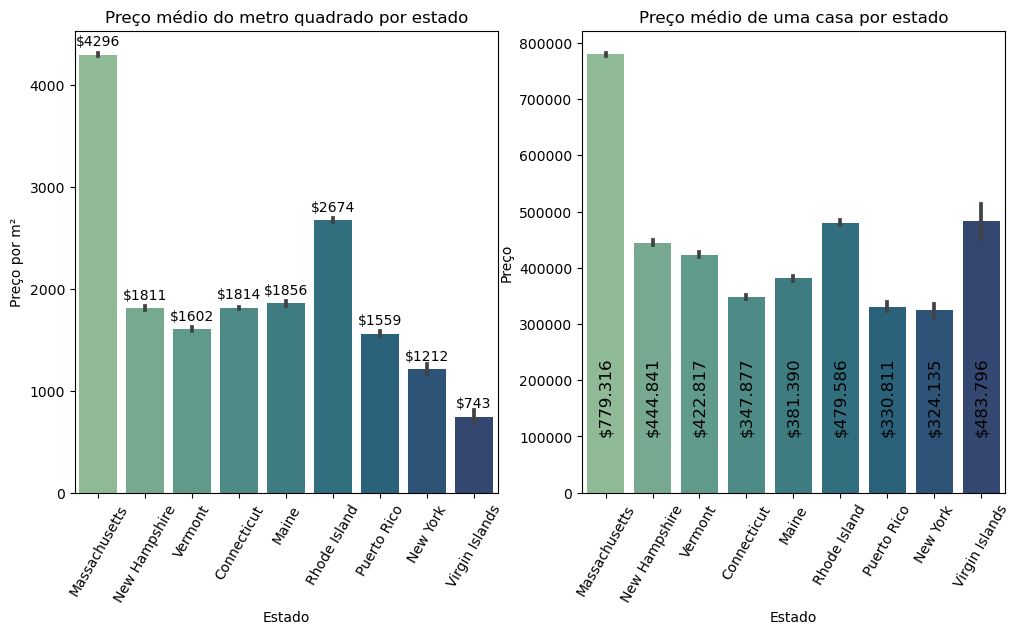

In [449]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.barplot(data=df, x='state', y='preco_m2', order=df['state'].value_counts(ascending=False).index, palette='crest')
plt.title('Preço médio do metro quadrado por estado')
plt.xlabel('Estado')
plt.ylabel('Preço por m²')
plt.xticks(rotation=60);

mean_values_m2 = df.groupby('state')['preco_m2'].mean()

mean_values_ordered = mean_values_m2[df['state'].value_counts(ascending=False).index]

for i, mean_value in enumerate(mean_values_ordered):
    plt.text(i, mean_value+60, f'${mean_value:.0f}', ha='center', va='bottom', fontsize=10)

plt.subplot(1,2,2)
sns.barplot(data=df, x='state', y='price', order=df['state'].value_counts(ascending=False).index, palette='crest')
plt.title('Preço médio de uma casa por estado')
plt.xlabel('Estado')
plt.ylabel('Preço')
plt.xticks(rotation=60);

mean_values_price = df.groupby('state')['price'].mean()
mean_values_price_ordered = mean_values_price[df['state'].value_counts(ascending=False).index]

for i, mean_value in enumerate(mean_values_price_ordered):
    mean_value_formatted = str(f'${mean_value:,.0f}').replace(',','.')
    plt.text(i, 100000, mean_value_formatted, ha='center', va='bottom', rotation=90, fontsize=12)

##### Existe uma correlação entre o tamanho da casa e o preço? E o tamanho do terreno? Qual deles influência mais?

In [437]:
from scipy.stats import pearsonr
house_apto = df.loc[df['house_size_m'] > 0]
corr, p = pearsonr(house_apto['price'], house_apto['house_size_m'])

lotes = df.loc[df['house_size_m'] == 0]
corr2, p2 = pearsonr(lotes['price'], lotes['lote_size_m'])
print(f'Correlação Tamanho da Casa-Preço de: {round(corr,3)}, P-Value: {round(p,3)}')
print(f'Correlação Tamanho do Terreno-Preço de: {round(corr2,3)}, P-Value: {round(p2,3)}')

Correlação Tamanho da Casa-Preço de: 0.396, P-Value: 0.0
Correlação Tamanho do Terreno-Preço de: 0.007, P-Value: 0.052


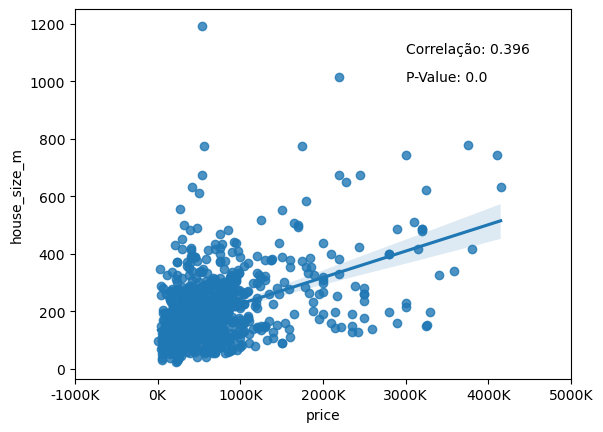

In [431]:
#filtered_df = df.loc[df['house_size_m'] != 0].sample(1000)
ax = sns.regplot(data=filtered_df, y='house_size_m', x='price')
plt.text(3.0e6, 1100, f'Correlação: {round(corr,3)}')
plt.text(3.0e6, 1000, f'P-Value: {p}');

xticks = ax.get_xticks()
xlabels = ['{:.0f}K'.format(x/1000) for x in xticks]

ax.set_xticks(xticks)
ax.set_xticklabels(xlabels);

##### Há uma correlação entre o número de banheiros e quartos de uma casa com o seu preço?

In [441]:
corr3, p3 = pearsonr(house_apto['price'], house_apto['bath'])
corr4, p4 = pearsonr(house_apto['price'], house_apto['bed'])

print(f'Correlação Nº de Banheiros-Preço de: {round(corr3,3)}, P-Value: {round(p3,3)}')
print(f'Correlação Nº de Quartos-Preço de: {round(corr4,3)}, P-Value: {round(p4,3)}')

Correlação Nº de Banheiros-Preço de: 0.505, P-Value: 0.0
Correlação Nº de Quartos-Preço de: 0.229, P-Value: 0.0


##### Qual o preço médio de um terreno? E de um apartamento?

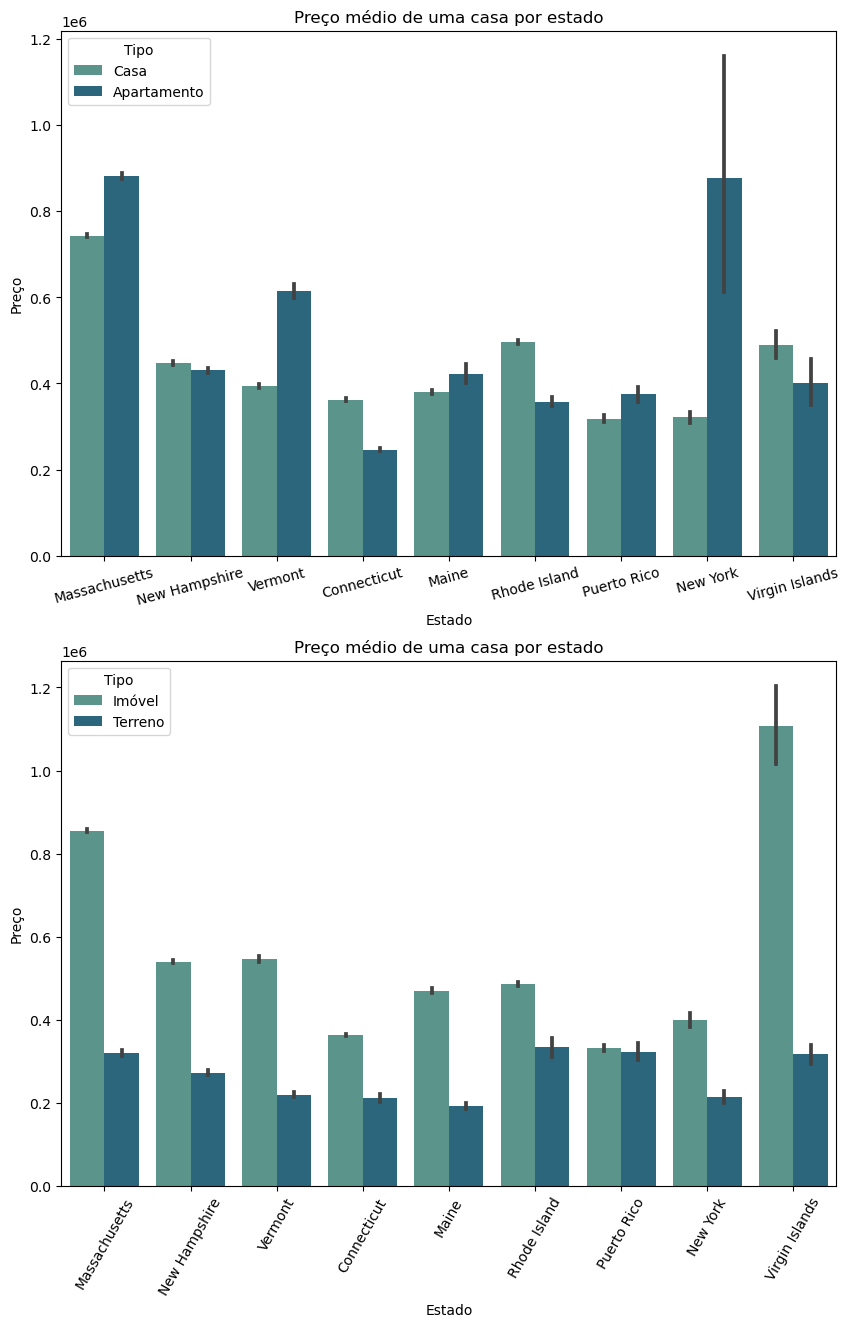

In [481]:
plt.figure(figsize=(10,15))

df['apto_label'] = df['apto'].map({True: 'Apartamento', False: 'Casa'})

plt.subplot(2,1,1)
sns.barplot(data=df, x='state', y='price', hue='apto_label', 
            order=df['state'].value_counts(ascending=False).index, palette='crest')
plt.title('Preço médio de uma casa por estado')
plt.xlabel('Estado')
plt.ylabel('Preço')
plt.legend(title='Tipo')
plt.xticks(rotation=15);

df.drop('apto_label', axis=1, inplace=True)

plt.subplot(2,1,2)

df['lote_label'] = df['lote'].map({True: 'Terreno', False: 'Imóvel'})

sns.barplot(data=df, x='state', y='price', hue='lote_label', 
            order=df['state'].value_counts(ascending=False).index, palette='crest')
plt.title('Preço médio de uma casa por estado')
plt.xlabel('Estado')
plt.ylabel('Preço')
plt.legend(title='Tipo')
plt.xticks(rotation=60);

## Ask & answer questions
- Preço médio de uma casa? Preço do metro quadrado? | RESPONDIDO | RESPONDIDO |
- Preço médio de uma casa em cada estado? Preço do metro quadrado? | RESPONDIDO | RESPONDIDO |
- Existe uma correlação entre o tamanho da casa e o preço? E o tamanho do terreno? Qual deles influência mais? | RESPONDIDO | RESPONDIDO |
- Há uma correlação entre o número de banheiros e quartos de uma casa com o seu preço?
- Qual o preço médio de um terreno? E de um apartamento?

## Summary and Conclusion
- Apenas 15 estados estão incluídos na lista
- Apenas 12 estados tem uma quantidade de dados consideráveis para a realização de análises
- A exorbitante maioria das vendas está localizada em estados de uma subregião dos EUA chamada Nova Inglaterra. Os insights dessa análise podem ser diferentes quando considerados dados de outras regiões americanas.